In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
import warnings
from typing import List
warnings.filterwarnings (action = 'ignore')

In [2]:
!unzip /content/drive/MyDrive/ZEPTO_DS/data.zip

Archive:  /content/drive/MyDrive/ZEPTO_DS/data.zip
  inflating: flipkart_com-ecommerce_sample.csv  


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Here we create a copy of df to run various analysis on that**

In [5]:
df1 = df

In [6]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [7]:
from ast import literal_eval

# ***Some Utility Functions***

In [8]:
def extract_primary_image(image_str):

    try:
        images = literal_eval(image_str)
        if images and isinstance(images, list):
            return images[0]
    except (ValueError, SyntaxError):
        return None

 ############ Will print the primary category from the category tree ########################
def extract_primary_category(product_category_tree):

    try:
        return literal_eval(product_category_tree)[0].split('>>')[0].strip()
    except (ValueError, SyntaxError, IndexError):
        return None

In [10]:
df1['primary_category'] = df1['product_category_tree'].apply(extract_primary_category)

In [11]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies


In [12]:

category_counts = df1['primary_category'].value_counts()
print(category_counts)


primary_category
Clothing                                               6198
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
                                                       ... 
Mast & Harbour Gold Synthetic  Clutch                     1
Asics Gel-Cumulus 17 Running Shoes                        1
Glacier Running Shoes                                     1
Starsy Solid Women's Round Neck Green T-Shirt             1
Areon Luxurious Fragrance Long Lasting Car,Home,...       1
Name: count, Length: 265, dtype: int64


# ***We can observe that Clothing is the most sought after category***

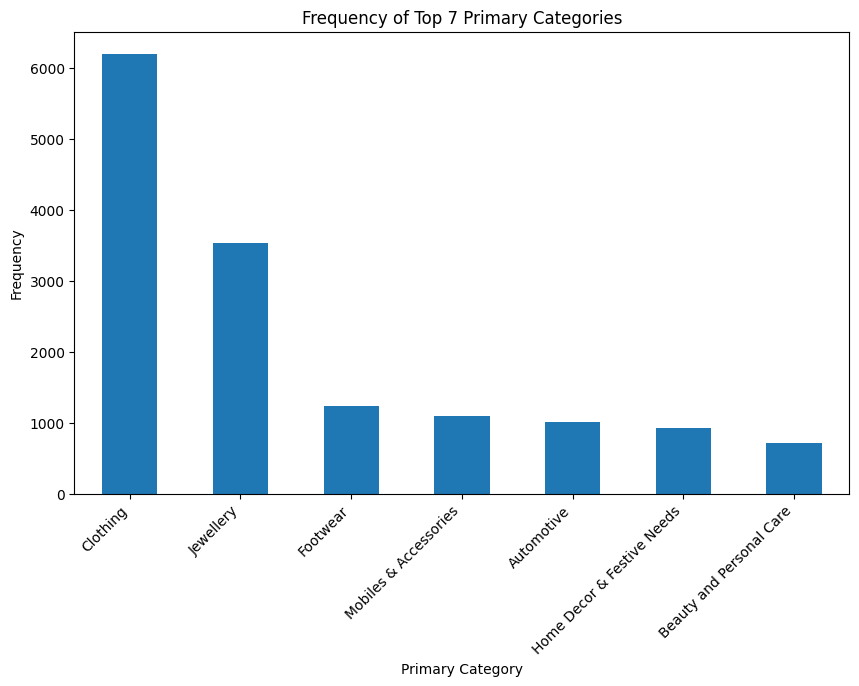

In [13]:
import matplotlib.pyplot as plt

top_7_categories = category_counts.head(7)

plt.figure(figsize=(10, 6))
top_7_categories.plot(kind='bar')
plt.title('Frequency of Top 7 Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# ***Some more Utility functions for moer analysis specifically to see the usage pattern among various genders ***

In [16]:
def determine_gender(product_name, description):

    keywords_women = ['women', 'woman', 'female', 'girls', 'girl', 'ladies', 'lady']
    keywords_men = ['men', 'man', 'male', 'boys', 'boy', 'gentlemen', 'gentleman']

    name_desc = f"{str(product_name).lower()} {str(description).lower()}"
    if any(keyword in name_desc for keyword in keywords_women):
        return 'Women'
    elif any(keyword in name_desc for keyword in keywords_men):
        return 'Men'
    else:
        return 'Unisex'

def preprocess_data(df):

    df['primary_category'] = df['product_category_tree'].apply(extract_primary_category)
    df['primary_image_link'] = df['image'].apply(extract_primary_image)
    df['gender'] = df.apply(lambda x: determine_gender(x['product_name'], x['description']), axis=1)

    columns_of_interest = ['pid', 'product_url', 'product_name', 'primary_category',
                           'retail_price', 'discounted_price', 'primary_image_link',
                           'description', 'brand', 'gender']
    refined_df = df[columns_of_interest]
    refined_df = refined_df.dropna(subset=['primary_category', 'retail_price', 'discounted_price'])
    return refined_df

In [17]:
def display_data_analysis(refined_df):

    st.header("Data Analysis")

    top_categories = refined_df['primary_category'].value_counts().nlargest(10).index
    top_categories_df = refined_df[refined_df['primary_category'].isin(top_categories)]

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='retail_price', y='primary_category', data=top_categories_df, ax=ax)
    ax.set_title('Price Distribution Across Top Categories')
    ax.set_xlabel('Retail Price')
    ax.set_ylabel('Category')
    st.pyplot(fig)

    refined_df['discount_percentage'] = ((refined_df['retail_price'] - refined_df['discounted_price']) / refined_df['retail_price']) * 100
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(refined_df['discount_percentage'], bins=30, kde=True, ax=ax)
    ax.set_title('Discount Percentage Distribution')
    ax.set_xlabel('Discount Percentage')
    ax.set_ylabel('Number of Products')
    st.pyplot(fig)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from ast import literal_eval

## ***We create another copy for df with focus on the column brand since it contains information of use We observe it has high no of null values ***

In [19]:
df2 = df

In [20]:
df2.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies


In [21]:
df2_red = preprocess_data(df2)

In [22]:
df2_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19922 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pid                 19922 non-null  object 
 1   product_url         19922 non-null  object 
 2   product_name        19922 non-null  object 
 3   primary_category    19922 non-null  object 
 4   retail_price        19922 non-null  float64
 5   discounted_price    19922 non-null  float64
 6   primary_image_link  19919 non-null  object 
 7   description         19920 non-null  object 
 8   brand               14071 non-null  object 
 9   gender              19922 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.7+ MB


In [23]:
null_counts = df2_red.isnull().sum()

# Print the number of null values per column
print(null_counts)

pid                      0
product_url              0
product_name             0
primary_category         0
retail_price             0
discounted_price         0
primary_image_link       3
description              2
brand                 5851
gender                   0
dtype: int64


In [24]:
null_columns = df2_red.isnull().sum()

columns_with_nulls = null_columns[null_columns > 0]

# Print the columns with null values and their counts
print(columns_with_nulls)


primary_image_link       3
description              2
brand                 5851
dtype: int64


In [25]:

columns_with_nulls = ['primary_image_link', 'description', 'brand']

rows_with_nulls = df[df[columns_with_nulls].isnull().any(axis=1)]

print(rows_with_nulls)


                                uniq_id            crawl_timestamp  \
25     bb41283056536d7af11e994ba4f9db81  2016-01-03 20:56:50 +0000   
26     ea91e47cac68b132887d7fc1175e91c2  2016-01-03 20:56:50 +0000   
27     bec784ef794cf596dbe2cbbaf5427ef0  2016-01-03 20:56:50 +0000   
28     171e0bcea390c17fd70e3ffa6c2cd187  2016-01-03 20:56:50 +0000   
29     a60ebb7803c6a31795de3f8949cb6f98  2016-01-03 20:56:50 +0000   
...                                 ...                        ...   
19953  77226646cd475e6e90954820197f8cac  2015-12-01 10:15:43 +0000   
19958  fb1ed40dd636c9eb3f8ccb281a04558d  2015-12-01 10:15:43 +0000   
19962  725fb81399c181c86be89675429b8d27  2015-12-01 10:15:43 +0000   
20000                               NaN                        NaN   
20001                               NaN                        NaN   

                                             product_url  \
25     http://www.flipkart.com/glus-wedding-lingerie-...   
26     http://www.flipkart.com/veelys-s

# ***We specifically print the brand null value containing rows and observe that the firct word in product_name is a possible candidate for brand name ***

In [26]:
rows_with_nulls.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category,primary_image_link,gender
25,bb41283056536d7af11e994ba4f9db81,2016-01-03 20:56:50 +0000,http://www.flipkart.com/glus-wedding-lingerie-...,Glus Wedding Lingerie Set,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",LINE92U9KGZG25AY,1299.0,699.0,"[""http://img5a.flixcart.com/image/lingerie-set...",False,Glus Wedding Lingerie Set - Buy Turquoise Glus...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img5a.flixcart.com/image/lingerie-set/5...,Unisex
26,ea91e47cac68b132887d7fc1175e91c2,2016-01-03 20:56:50 +0000,http://www.flipkart.com/veelys-shiny-white-qua...,Veelys Shiny White Quad Roller Skates - Size 4...,"[""Sports & Fitness >> Other Sports >> Skating ...",SKTEC88WSNYJKWY7,3199.0,2499.0,"[""http://img6a.flixcart.com/image/skate/w/y/7/...",False,Veelys Shiny White Quad Roller Skates - Size 4...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Playing Le...",Sports & Fitness,http://img6a.flixcart.com/image/skate/w/y/7/ve...,Men
27,bec784ef794cf596dbe2cbbaf5427ef0,2016-01-03 20:56:50 +0000,http://www.flipkart.com/bulaky-vanity-case-jew...,Bulaky vanity case Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANDZY4YZFPEG85T,499.0,390.0,"[""http://img6a.flixcart.com/image/vanity-box/8...",False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,NaN,"{""product_specification""=>{""key""=>""Body Materi...",Beauty and Personal Care,http://img6a.flixcart.com/image/vanity-box/8/5...,Men
28,171e0bcea390c17fd70e3ffa6c2cd187,2016-01-03 20:56:50 +0000,http://www.flipkart.com/fdt-women-s-leggings/p...,FDT Women's Leggings,"[""Clothing >> Women's Clothing >> Fusion Wear ...",LJGEB2KMCMMHHFC7,699.0,309.0,"[""http://img6a.flixcart.com/image/legging-jegg...",False,FDT Women's Leggings - Buy Parrot Green FDT Wo...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img6a.flixcart.com/image/legging-jeggin...,Women
29,a60ebb7803c6a31795de3f8949cb6f98,2016-01-03 20:56:50 +0000,http://www.flipkart.com/madcaps-c38gr30-men-s-...,Madcaps C38GR30 Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",CRGE6A53UX7CJMXX,2199.0,1699.0,"[""http://img5a.flixcart.com/image/cargo/n/g/h/...",False,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img5a.flixcart.com/image/cargo/n/g/h/ca...,Men


In [27]:
rows_with_nulls['product_name']

,product_name
25,Glus Wedding Lingerie Set
26,Veelys Shiny White Quad Roller Skates - Size 4...
27,Bulaky vanity case Jewellery Vanity Case
28,FDT Women's Leggings
29,Madcaps C38GR30 Men's Cargos
...,...
19953,La Isla Women Heels
19958,We Witches Comfy Hues Women Wedges
19962,Stylistry Women Heels
20000,NaN


In [28]:
df2_red['product_name']

,product_name
0,Alisha Solid Women's Cycling Shorts
1,FabHomeDecor Fabric Double Sofa Bed
2,AW Bellies
3,Alisha Solid Women's Cycling Shorts
4,Sicons All Purpose Arnica Dog Shampoo
...,...
19995,WallDesign Small Vinyl Sticker
19996,Wallmantra Large Vinyl Stickers Sticker
19997,Elite Collection Medium Acrylic Sticker
19998,Elite Collection Medium Acrylic Sticker


# ***So removing all the entries that contain null values for product_name and product_description is necassary***

In [29]:

nan_count = df2_red['product_name'].isnull().sum()

print(f"Number of NaN values in 'product_name' column: {nan_count}")


Number of NaN values in 'product_name' column: 0


In [34]:
rows_with_nulls.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category,primary_image_link,gender
25,bb41283056536d7af11e994ba4f9db81,2016-01-03 20:56:50 +0000,http://www.flipkart.com/glus-wedding-lingerie-...,Glus Wedding Lingerie Set,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",LINE92U9KGZG25AY,1299.0,699.0,"[""http://img5a.flixcart.com/image/lingerie-set...",False,Glus Wedding Lingerie Set - Buy Turquoise Glus...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img5a.flixcart.com/image/lingerie-set/5...,Unisex
26,ea91e47cac68b132887d7fc1175e91c2,2016-01-03 20:56:50 +0000,http://www.flipkart.com/veelys-shiny-white-qua...,Veelys Shiny White Quad Roller Skates - Size 4...,"[""Sports & Fitness >> Other Sports >> Skating ...",SKTEC88WSNYJKWY7,3199.0,2499.0,"[""http://img6a.flixcart.com/image/skate/w/y/7/...",False,Veelys Shiny White Quad Roller Skates - Size 4...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Playing Le...",Sports & Fitness,http://img6a.flixcart.com/image/skate/w/y/7/ve...,Men
27,bec784ef794cf596dbe2cbbaf5427ef0,2016-01-03 20:56:50 +0000,http://www.flipkart.com/bulaky-vanity-case-jew...,Bulaky vanity case Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANDZY4YZFPEG85T,499.0,390.0,"[""http://img6a.flixcart.com/image/vanity-box/8...",False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,NaN,"{""product_specification""=>{""key""=>""Body Materi...",Beauty and Personal Care,http://img6a.flixcart.com/image/vanity-box/8/5...,Men
28,171e0bcea390c17fd70e3ffa6c2cd187,2016-01-03 20:56:50 +0000,http://www.flipkart.com/fdt-women-s-leggings/p...,FDT Women's Leggings,"[""Clothing >> Women's Clothing >> Fusion Wear ...",LJGEB2KMCMMHHFC7,699.0,309.0,"[""http://img6a.flixcart.com/image/legging-jegg...",False,FDT Women's Leggings - Buy Parrot Green FDT Wo...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img6a.flixcart.com/image/legging-jeggin...,Women
29,a60ebb7803c6a31795de3f8949cb6f98,2016-01-03 20:56:50 +0000,http://www.flipkart.com/madcaps-c38gr30-men-s-...,Madcaps C38GR30 Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",CRGE6A53UX7CJMXX,2199.0,1699.0,"[""http://img5a.flixcart.com/image/cargo/n/g/h/...",False,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,http://img5a.flixcart.com/image/cargo/n/g/h/ca...,Men


2024-08-09 05:45:08.077 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


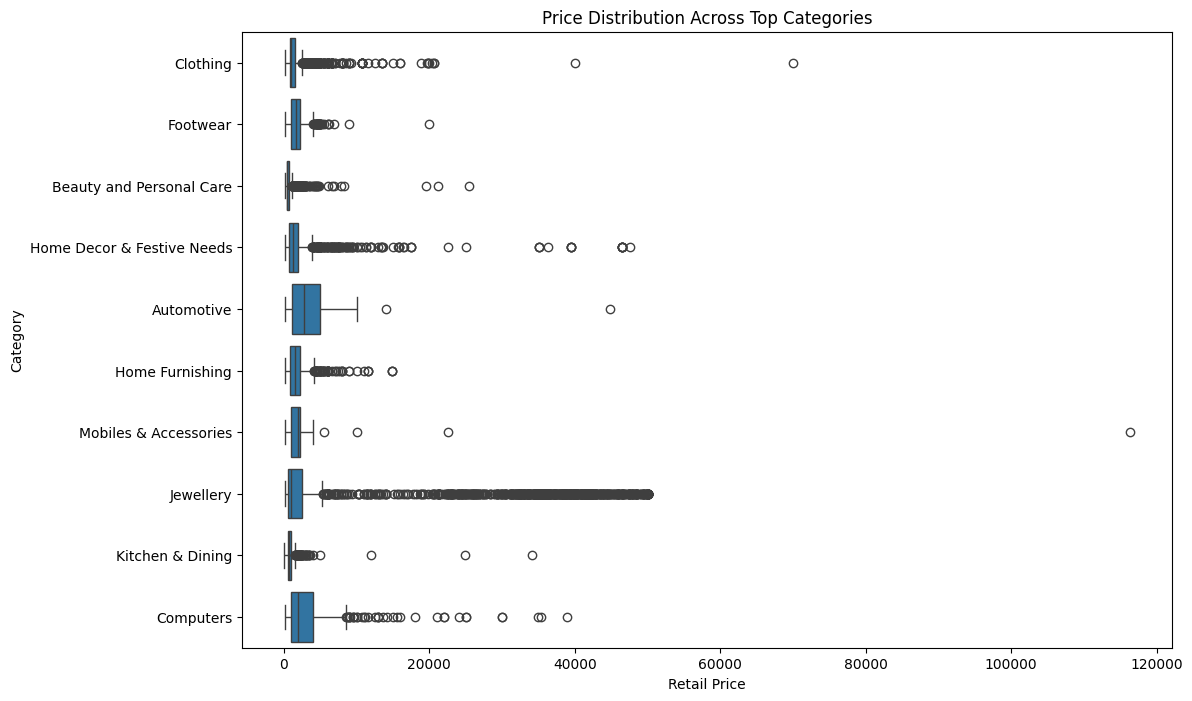

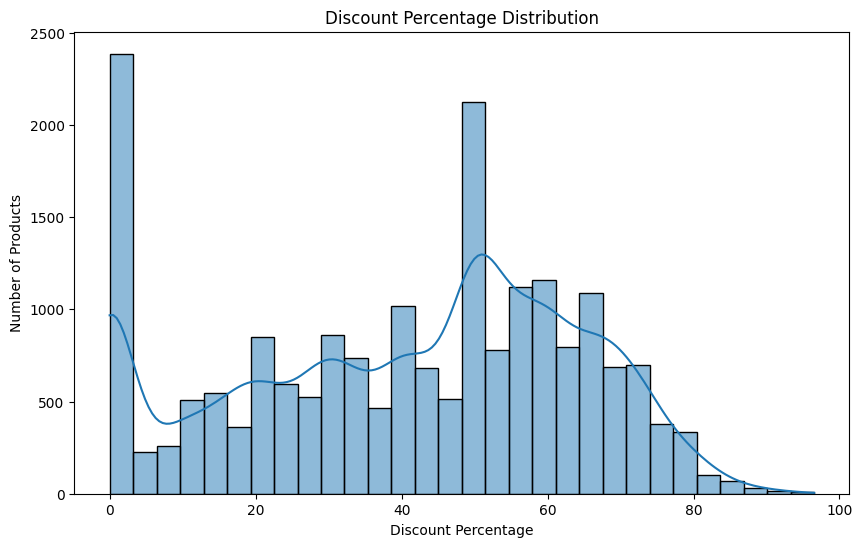

In [35]:
display_data_analysis(df2)

# **Some further analysis has been done below**

In [36]:
import numpy as np

In [37]:
df = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')

In [38]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [40]:
df.shape

(20002, 15)

In [41]:
data =df

# *Plotting word length in the description column*

<ipython-input-42-5d0906e7873f>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  words_distribution = data.groupby('bins').size().reset_index(name='word_counts')


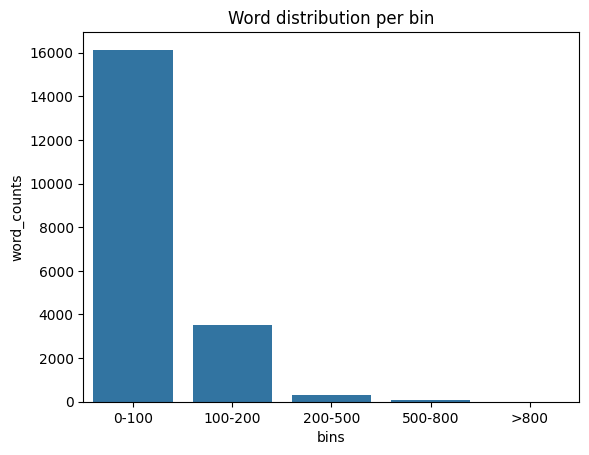

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt



data['length'] = data['description'].str.len()



data['no_of_words'] = data['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)



bins = [0, 100, 300, 500, 800, np.inf]

labels = ['0-100', '100-200', '200-500', '500-800', '>800']

data['bins'] = pd.cut(data.no_of_words, bins=bins, labels=labels)

words_distribution = data.groupby('bins').size().reset_index(name='word_counts')

sns.barplot(x='bins', y='word_counts', data=words_distribution)

plt.title("Word distribution per bin")

plt.show()

In [43]:
data = data[data['description'].notna()]
#keeping only those datapoints product_category_tree is not NaN
data = data[data['product_category_tree'].notna()]
#dropping the datapoints with duplicate descriptions
data = data.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
data = data.reset_index(drop=True)
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,length,no_of_words,bins
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",410.0,64.0,0-100
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",4433.0,752.0,500-800
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",650.0,107.0,100-200
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",403.0,63.0,0-100
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",248.0,40.0,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17534,3ab6fae88a53a66dd7c3cbf6fc9fbd3c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEBU65TYHDZPGX,3559.0,1369.0,"[""http://img5a.flixcart.com/image/sticker/p/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",210.0,31.0,0-100
17535,d5a16fb788c38554feb734c15d66be6b,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UWNR43SZ4,3016.0,2194.0,"[""http://img6a.flixcart.com/image/sticker/5/q/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",222.0,33.0,0-100
17536,43c9e22c8e9d67c0ef63f6b2d11671d7,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEBU65VMEQGTZY,7069.0,2719.0,"[""http://img5a.flixcart.com/image/sticker/t/z/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17539 entries, 0 to 17538
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   uniq_id                  17539 non-null  object  
 1   crawl_timestamp          17539 non-null  object  
 2   product_url              17539 non-null  object  
 3   product_name             17539 non-null  object  
 4   product_category_tree    17539 non-null  object  
 5   pid                      17539 non-null  object  
 6   retail_price             17465 non-null  float64 
 7   discounted_price         17465 non-null  float64 
 8   image                    17536 non-null  object  
 9   is_FK_Advantage_product  17539 non-null  object  
 10  description              17539 non-null  object  
 11  product_rating           17539 non-null  object  
 12  overall_rating           17539 non-null  object  
 13  brand                    12273 non-null  object  
 14  produc

In [45]:
max_desc_len = -1
desc_len_sum = 0
min_desc_len = 10000

product_description = data["description"].tolist()

for i in range(len(product_description)):
    try:
        max_desc_len = max(max_desc_len,len(product_description[i]))
        min_desc_len = min(min_desc_len,len(product_description[i]))
        desc_len_sum+=len(product_description[i])
    except:
        pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5309.
Min description length is 74.
Average description length is 439.516506072182.


In [46]:
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })

missing['percent'] = missing['missing'] /len(data)

missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5266,0.300245
retail_price,74,0.004219
discounted_price,74,0.004219
product_specifications,14,0.000798
image,3,0.000171
uniq_id,0,0.000000
product_rating,0,0.000000
no_of_words,0,0.000000
length,0,0.000000
overall_rating,0,0.000000


In [47]:
data.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,74
discounted_price,74
image,3
is_FK_Advantage_product,0


In [48]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'length',
       'no_of_words', 'bins'],
      dtype='object')

In [49]:
data.duplicated().value_counts()

,count
False,17539


In [50]:
data['crawl_timestamp']=pd.to_datetime(data['crawl_timestamp'])
data['crawl_timestamp']

,crawl_timestamp
0,2016-03-25 22:59:23+00:00
1,2016-03-25 22:59:23+00:00
2,2016-03-25 22:59:23+00:00
3,2016-03-25 22:59:23+00:00
4,2016-03-25 22:59:23+00:00
...,...
17534,2015-12-01 10:15:43+00:00
17535,2015-12-01 10:15:43+00:00
17536,2015-12-01 10:15:43+00:00
17537,2015-12-01 10:15:43+00:00


In [51]:
data['crawl_year']=data['crawl_timestamp'].apply(lambda x : x.year)

In [52]:
data['crawl_year']

,crawl_year
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
17534,2015
17535,2015
17536,2015
17537,2015


In [53]:
data['Month']=data['crawl_timestamp'].apply(lambda x : x.month)
data['Month']

,Month
0,3
1,3
2,3
3,3
4,3
...,...
17534,12
17535,12
17536,12
17537,12


In [54]:
data['main_category'] = data['product_category_tree'].apply(
    lambda x: x.split('>>')[0][2:len(x.split('>>')[0])-1] if isinstance(x, str) else None
)


In [55]:
def secondary_category(value):
    if isinstance(value, str):
        try:
            return value.split('>>')[1][1:len(value.split('>>')[1])-1]
        except IndexError:
            return 'None'
    else:
        return 'None'

def tertiary_category(value):
    if isinstance(value, str):
        try:
            return value.split('>>')[2][1:len(value.split('>>')[2])-1]
        except IndexError:
            return 'None'
    else:
        return 'None'

def quaternary_category(value):
    if isinstance(value, str):
        try:
            return value.split('>>')[3][1:len(value.split('>>')[3])-1]
        except IndexError:
            return 'None'
    else:
        return 'None'


In [56]:
data['secondary']=data['product_category_tree'].apply(secondary_category)
data['tertiary']=data['product_category_tree'].apply(tertiary_category)
data['quaternary']=data['product_category_tree'].apply(quaternary_category)

In [57]:
data.head(n=5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_specifications,length,no_of_words,bins,crawl_year,Month,main_category,secondary,tertiary,quaternary
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,"{""product_specification""=>[{""key""=>""Number of ...",410.0,64.0,0-100,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,"{""product_specification""=>[{""key""=>""Installati...",4433.0,752.0,500-800,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,"{""product_specification""=>[{""key""=>""Ideal For""...",650.0,107.0,100-200,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,"{""product_specification""=>[{""key""=>""Number of ...",403.0,63.0,0-100,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,"{""product_specification""=>[{""key""=>""Pet Type"",...",248.0,40.0,0-100,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [58]:
plt.figure(figsize=(150,10))
temp=data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

<ipython-input-58-7b5dba64b348>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  temp=data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)


Text(0, 0.5, 'Sales')

In [59]:
data.groupby(by='crawl_year',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

<ipython-input-59-070c57e7e12f>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  data.groupby(by='crawl_year',axis=0).count().plot(kind='bar',legend=False)


Text(0, 0.5, 'Sales')

In [60]:
plt.figure(figsize=(10,10))
data['main_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

In [61]:
data['main_category'].value_counts()[:10].sort_values(ascending=False)

,count
main_category,
Clothing,5503
Jewellery,2946
Footwear,1123
Automotive,1009
Home Decor & Festive Needs,819
Beauty and Personal Care,697
Kitchen & Dining,643
Mobiles & Accessories,591
Computers,576


In [62]:
data['secondary'].value_counts()[:10].sort_values(ascending=False)

,count
secondary,
Women's Clothing,3486
Men's Clothing,1517
Necklaces & Chains,1211
Accessories & Spare parts,922
"Rings""",692
Women's Footwear,685
"Bangles, Bracelets & Armlets",581
Wrist Watches,523
Kids' Clothing,496


In [63]:
data['tertiary'].value_counts()[:10].sort_values(ascending=False)

,count
tertiary,
Western Wear,1846
None,1407
"Necklaces""",1172
"Lingerie, Sleep & Swimwear",1006
T-Shirts,726
Car Interior & Exterior,674
Casual Shoes,435
Ethnic Wear,421
Deodorants,377


# ***Below we calculated the most frequent tertiary and secondary categories***

In [64]:

most_frequent_main_category = data['main_category'].value_counts().idxmax()


filtered_data = data[data['main_category'] == most_frequent_main_category]

most_frequent_secondary_category = filtered_data['secondary'].value_counts().idxmax()


print(f"Most Frequent Main Category: {most_frequent_main_category}")
print(f"Most Frequent Secondary Category within '{most_frequent_main_category}': {most_frequent_secondary_category}")


Most Frequent Main Category: Clothing
Most Frequent Secondary Category within 'Clothing': Women's Clothing


In [65]:

most_frequent_secondary_category = data['secondary'].value_counts().idxmax()


filtered_data_secondary = data[data['secondary'] == most_frequent_secondary_category]


most_frequent_tertiary_category = filtered_data_secondary['tertiary'].value_counts().idxmax()

# Print the results
print(f"Most Frequent Secondary Category: {most_frequent_secondary_category}")
print(f"Most Frequent Tertiary Category within '{most_frequent_secondary_category}': {most_frequent_tertiary_category}")


Most Frequent Secondary Category: Women's Clothing
Most Frequent Tertiary Category within 'Women's Clothing': Western Wear


In [66]:
data['discounted_price'].max()

571230.0

In [67]:
data['discounted_percentage']=round((data['retail_price']-data['discounted_price'])/data['retail_price']*100,1)

In [68]:
main_category_discount_percentage=data.groupby('main_category').agg({'discounted_percentage':[np.mean],'main_category':['count']})
main_category_discount_percentage

<ipython-input-68-934bcad5998d>:1: FutureWarning: The provided callable <function mean at 0x7c9f8fa8b400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  main_category_discount_percentage=data.groupby('main_category').agg({'discounted_percentage':[np.mean],'main_category':['count']})


,discounted_percentage,main_category
,mean,count
main_category,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",0.0,1
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1
...,...,...
"run of luck Solid Women's Round Neck Dark Blue T...""",0.0,1
"soie Fashion Women's Full Coverage Bra""",10.0,1


In [69]:
main_category_discount_percentage.columns=['_' .join(column) for column in main_category_discount_percentage.columns]
main_category_discount_percentage

,discounted_percentage_mean,main_category_count
main_category,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",0.0,1
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1
...,...,...
"run of luck Solid Women's Round Neck Dark Blue T...""",0.0,1
"soie Fashion Women's Full Coverage Bra""",10.0,1
"soie Fashion Women's Sports Bra""",10.0,1


In [70]:
plt.figure(figsize=(10,10))
main_category_discount_percentage[main_category_discount_percentage['main_category_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh',legend=False)

<Axes: ylabel='main_category'>

In [71]:
main_category_discount_percentage[main_category_discount_percentage['main_category_count']>50].sort_values(by='main_category_count',ascending=False)

,discounted_percentage_mean,main_category_count
main_category,,
Clothing,44.371092,5503
Jewellery,39.748911,2946
Footwear,35.903747,1123
Automotive,54.704469,1009
Home Decor & Festive Needs,35.754345,819
Beauty and Personal Care,19.649713,697
Kitchen & Dining,43.850858,643
Mobiles & Accessories,48.149236,591
Computers,43.400000,576


In [72]:
plt.figure(figsize=(10,10))
main_category_discount_percentage[main_category_discount_percentage['main_category_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh',legend=False)

<Axes: ylabel='main_category'>

In [74]:
secondary_discounted_percentage=data.groupby('secondary').agg({'discounted_percentage':[np.mean],'secondary':['count']})
secondary_discounted_percentage

<ipython-input-74-1f2775b77af9>:1: FutureWarning: The provided callable <function mean at 0x7c9f8fa8b400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  secondary_discounted_percentage=data.groupby('secondary').agg({'discounted_percentage':[np.mean],'secondary':['count']})


,discounted_percentage,secondary
,mean,count
secondary,,
"AAO+ Aviator Sunglasses""",70.100000,3
"ABCD Small Bean Bag With Foam Filling (Black)""",60.900000,1
Academic Texts,8.333333,9
Accessories,42.554054,112
Accessories & Spare parts,55.432391,922
...,...,...
"Zyaden Oval Sunglasses""",60.100000,2
"barbarik Wayfarer, Aviator Sunglasses""",88.000000,1


In [75]:
secondary_discounted_percentage.columns=['_'.join (column) for column in secondary_discounted_percentage.columns]
secondary_discounted_percentage.columns

Index(['discounted_percentage_mean', 'secondary_count'], dtype='object')

In [76]:
plt.figure(figsize=(30,30))
plt.yticks(size=30)
plt.xticks(size=30)
secondary_discounted_percentage[secondary_discounted_percentage['secondary_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh')

<Axes: ylabel='secondary'>

In [77]:
tertiary_discount_percentage=data.groupby('tertiary').agg({'discounted_percentage':[np.mean],'tertiary':['count']})
tertiary_discount_percentage

<ipython-input-77-864bce7855e9>:1: FutureWarning: The provided callable <function mean at 0x7c9f8fa8b400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tertiary_discount_percentage=data.groupby('tertiary').agg({'discounted_percentage':[np.mean],'tertiary':['count']})


,discounted_percentage,tertiary
,mean,count
tertiary,,
"3wish Wrist Watches""",66.8,1
"A Avon Wrist Watches""",50.4,2
A R ENTERPRISES Musical Instruments & Toys,70.1,1
"ABCD XL Bean Bag With Foam Filling (Orange)""",70.5,1
AKUP Coffee Mugs,48.2,22
...,...,...
"piftif Women's Sports Bra""",53.8,1
posterchacha Coffee Mugs,12.5,1


In [78]:
tertiary_discount_percentage.columns=['_'.join(column) for column in tertiary_discount_percentage.columns]

In [79]:
plt.figure(figsize=(20,20))
tertiary_discount_percentage[tertiary_discount_percentage['tertiary_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh')
plt.xticks(size=20)
plt.yticks(size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Prithish Coffee Mugs"'),
  Text(0, 1, 'Car Interior & Exterior'),
  Text(0, 2, 'Rockmantra Coffee Mugs"'),
  Text(0, 3, 'Bangles"'),
  Text(0, 4, 'Lingerie, Sleep & Swimwear'),
  Text(0, 5, 'Wall Decals & Stickers'),
  Text(0, 6, 'Printland Coffee Mugs"'),
  Text(0, 7, 'Ethnic Wear'),
  Text(0, 8, 'Hand Bags'),
  Text(0, 9, 'Heels"'),
  Text(0, 10, 'Batteries'),
  Text(0, 11, 'Backpacks'),
  Text(0, 12, 'Western Wear'),
  Text(0, 13, 'USB Gadgets'),
  Text(0, 14, 'Fusion Wear'),
  Text(0, 15, 'Bracelets"'),
  Text(0, 16, 'Series Lights'),
  Text(0, 17, 'Stickers'),
  Text(0, 18, 'Spares & Performance Parts'),
  Text(0, 19, 'Brooches'),
  Text(0, 20, 'Necklaces"'),
  Text(0, 21, 'Cases & Covers'),
  Text(0, 22, 'Formal Shoe

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17539 entries, 0 to 17538
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  17539 non-null  object             
 1   crawl_timestamp          17539 non-null  datetime64[ns, UTC]
 2   product_url              17539 non-null  object             
 3   product_name             17539 non-null  object             
 4   product_category_tree    17539 non-null  object             
 5   pid                      17539 non-null  object             
 6   retail_price             17465 non-null  float64            
 7   discounted_price         17465 non-null  float64            
 8   image                    17536 non-null  object             
 9   is_FK_Advantage_product  17539 non-null  object             
 10  description              17539 non-null  object             
 11  product_rating           175

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from ast import literal_eval

In [88]:
data['primary_image_link'] = data['image'].apply(extract_primary_image)

In [89]:
data['gender'] = df.apply(lambda x: determine_gender(x['product_name'], x['description']), axis=1)

In [90]:
data1 = data

# ***Since the description column is the column of our interest we do text preprocessing techniques on it**

In [91]:
data1['description'] = data1['description'].str.replace(r'[^\w\d\s]',' ')

data1['description'] = data1['description'].str.replace(r'\s+',' ')


data1['description'] = data1['description'].str.replace(r'^\s+|\s+?$','')


data1['description'] = data1['description'].str.lower()

data1['description'].head()

,description
0,key features of alisha solid women's cycling s...
1,fabhomedecor fabric double sofa bed (finish co...
2,key features of aw bellies sandals wedges heel...
3,key features of alisha solid women's cycling s...
4,specifications of sicons all purpose arnica do...


In [93]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
import re

pattern = r'\b(?:{})\b'.format('|'.join(stop))

data1['description'] = data1['description'].str.replace(pattern, '')



data1['description'] = data1['description'].str.replace(r'\s+', ' ')

data1['description'] = data1['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))



specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]

data1['description'] = data1['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))

data1['description'].head()

,description
0,features of alisha solid women's cycling short...
1,fabhomedecor fabric double sofa bed (finish co...
2,features of aw bellies sandals wedges heel cas...
3,features of alisha solid women's cycling short...
4,specifications of sicons all purpose arnica do...


# ***Below we have plotted the various other analysis like which year had more sale and which month  has highest sale***

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 15000x1000 with 0 Axes>

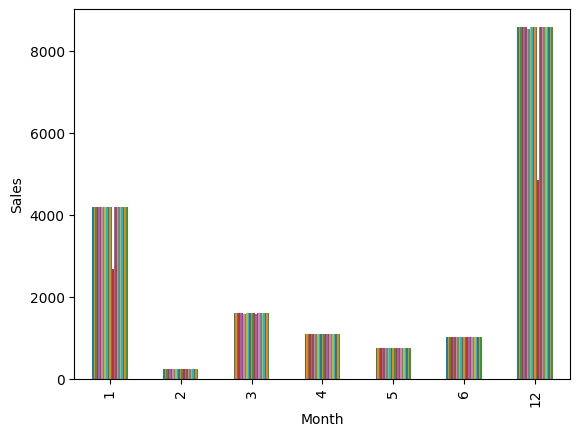

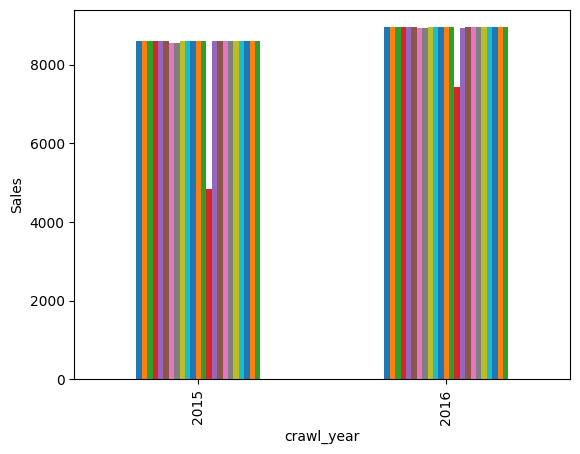

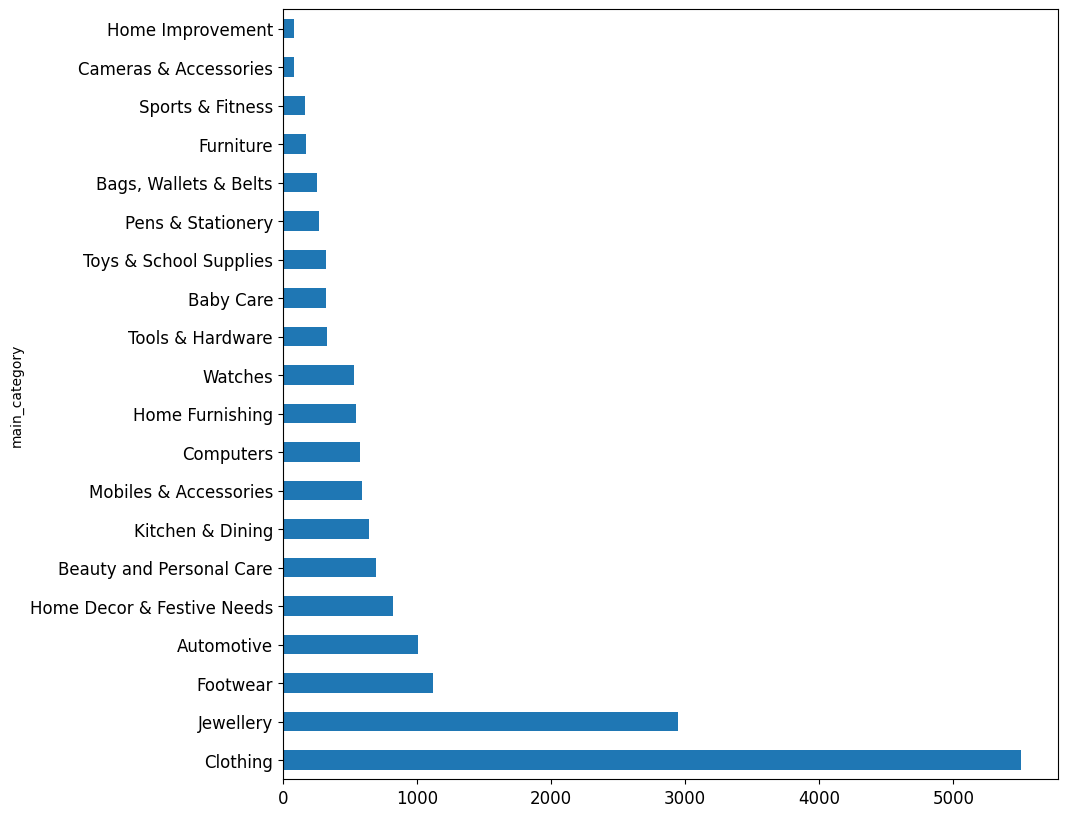

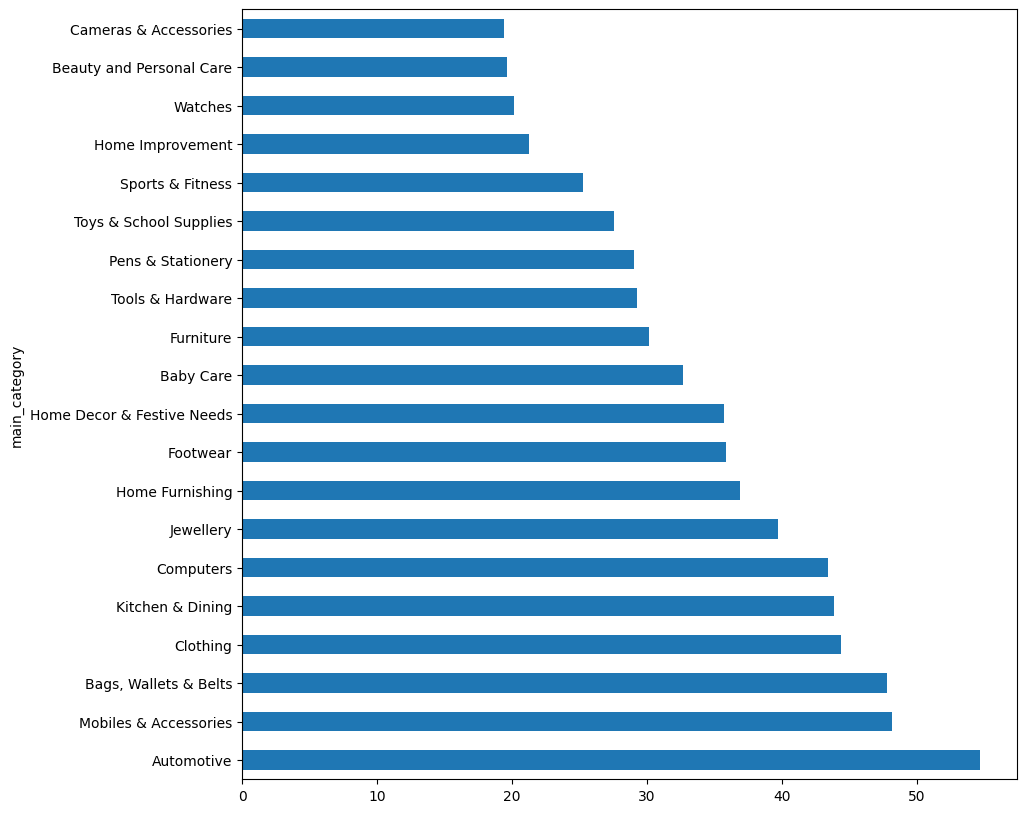

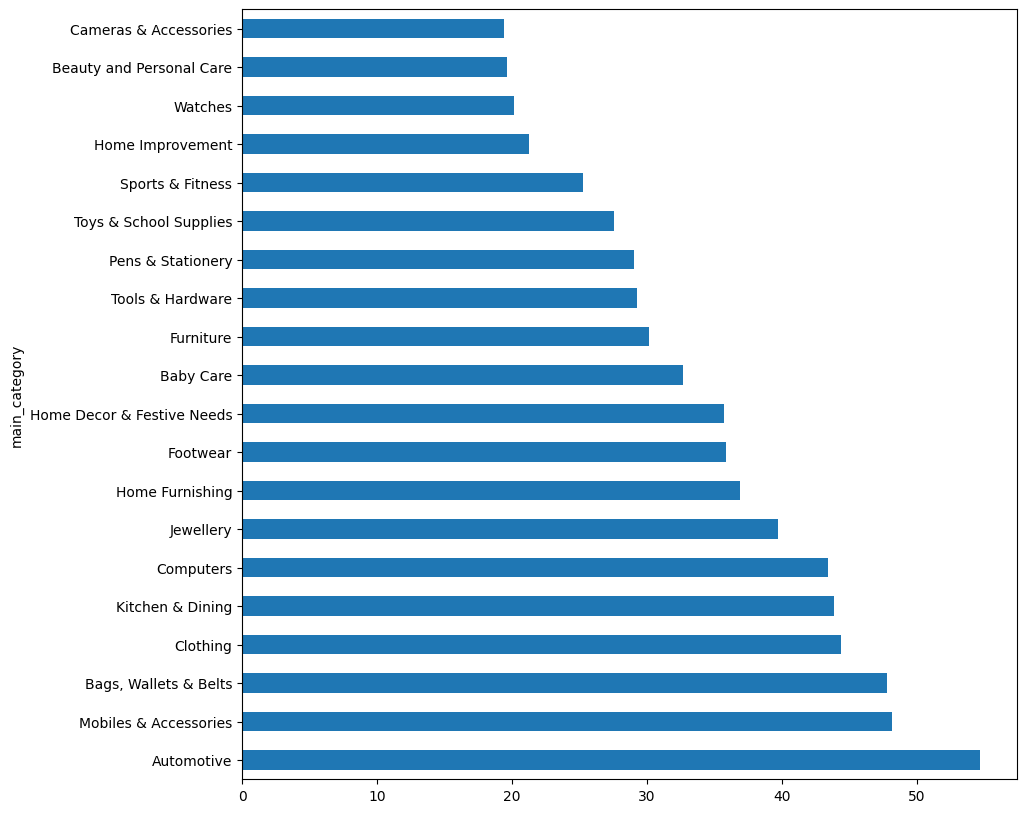

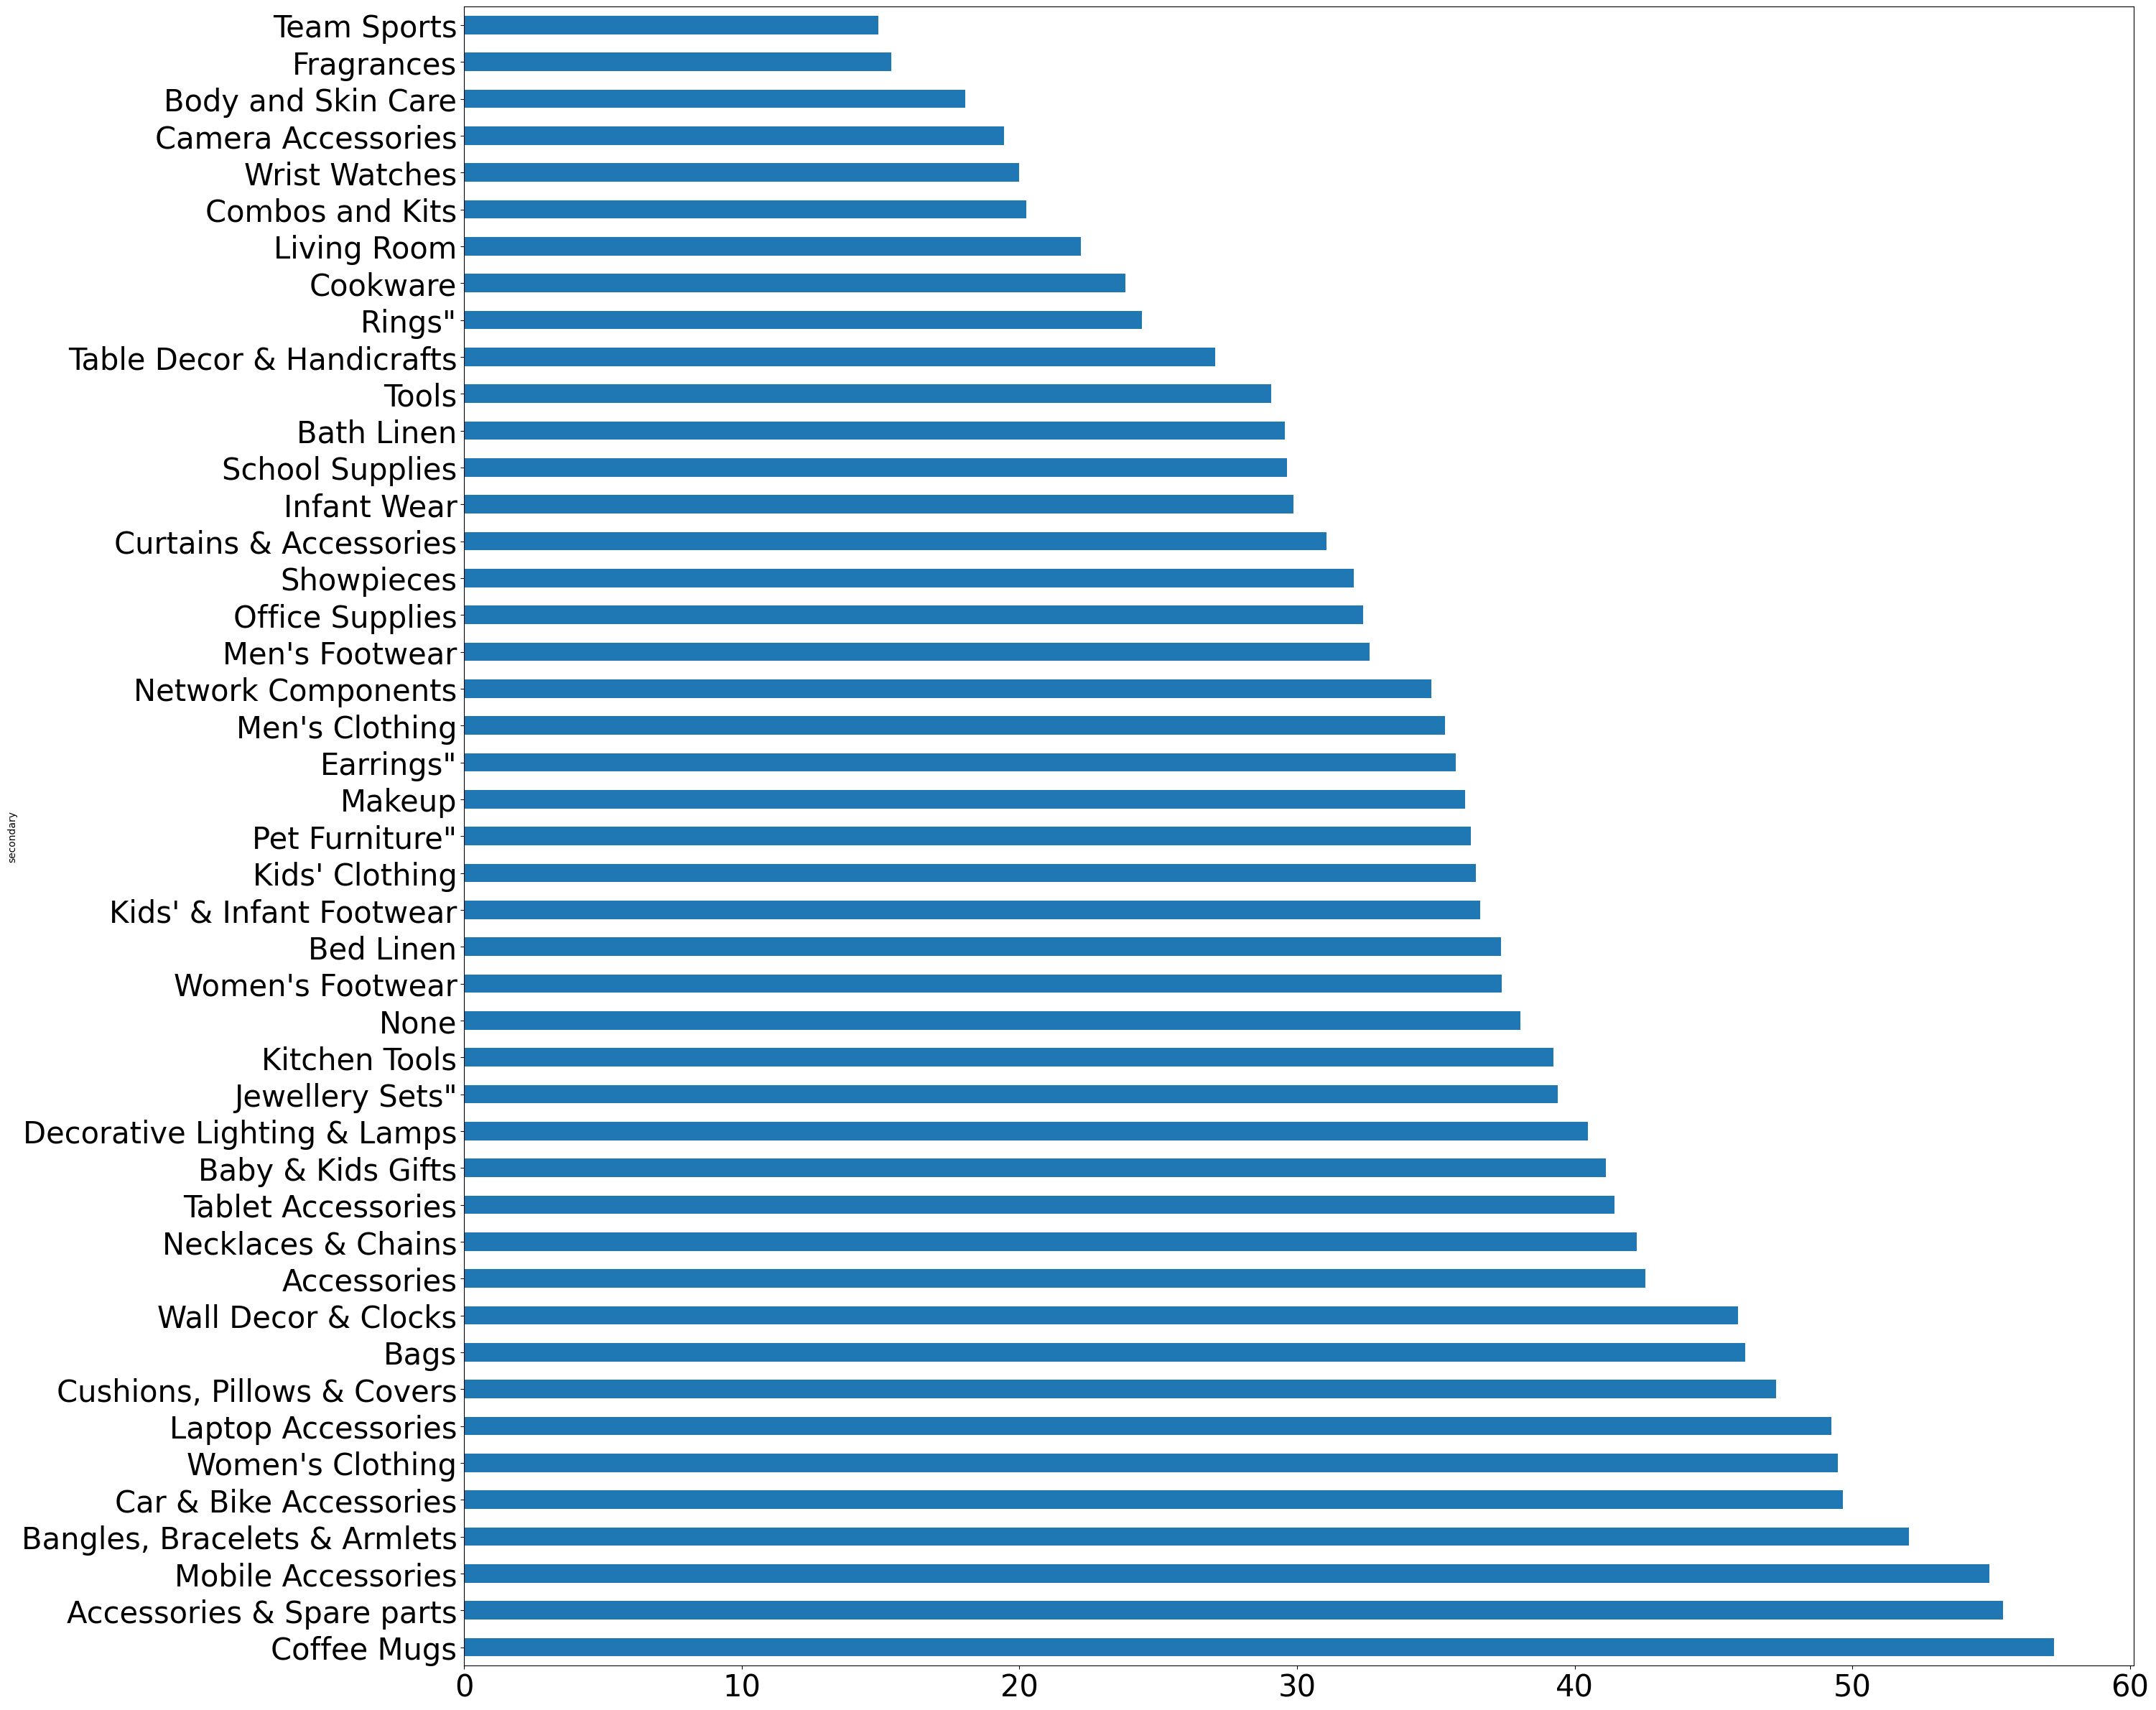

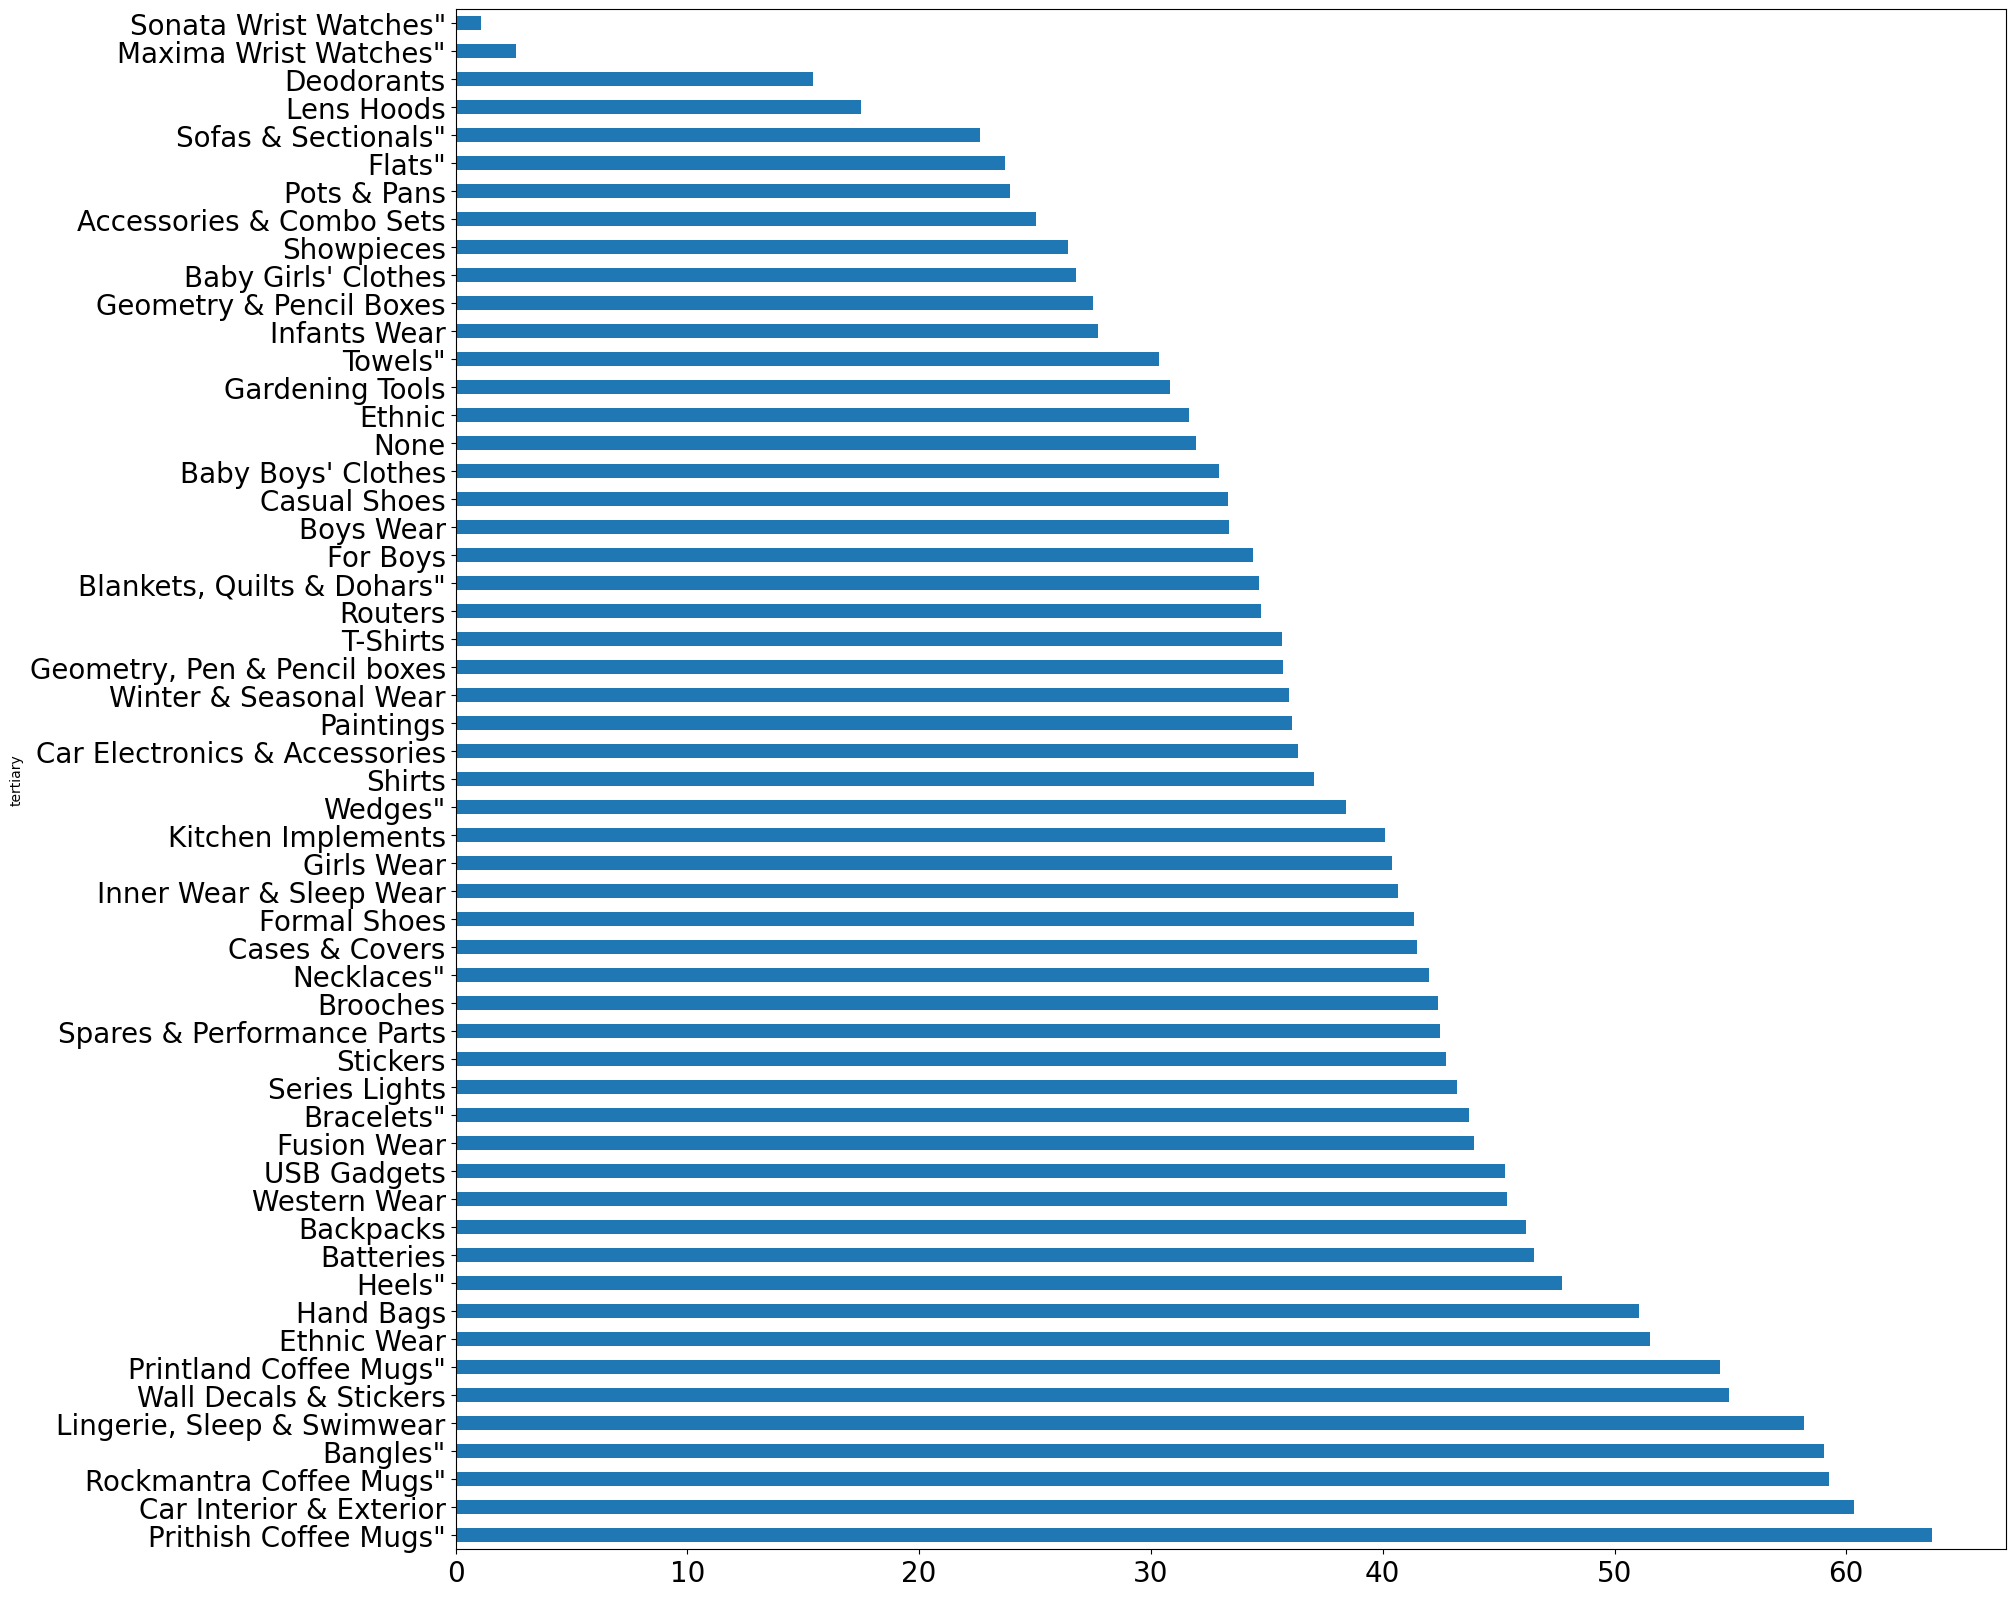

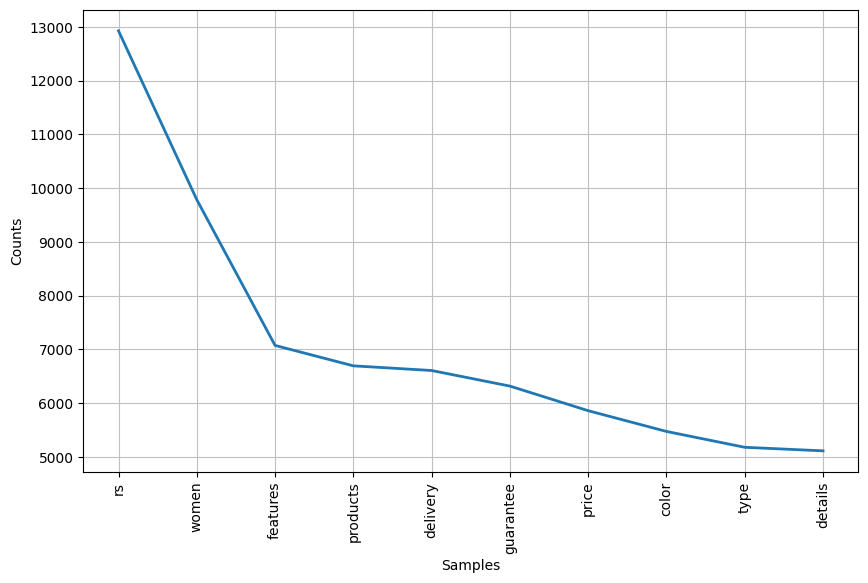

[('rs', 12928), ('women', 9786), ('features', 7074), ('products', 6694), ('delivery', 6607), ('guarantee', 6317), ('price', 5859), ('color', 5473), ('type', 5178), ('details', 5112)]


In [95]:
import nltk
nltk.download('punkt')

a = data1['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)

words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in stopwords.words('english')]

word_dist = nltk.FreqDist(words)

plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

print(word_dist.most_common(10))

# **From above analysis we find an interseting pattern that most sale occurs in december that is winter season and is done by women of particularly clothing, So at every change of season there is surge in sales due to clothing format change**

In [151]:

num_duplicates = data1.duplicated().sum()

print(f"Number of duplicate rows in data1: {num_duplicates}")


Number of duplicate rows in data1: 0


In [97]:

specific_columns = ['product_name']


num_duplicates_specific = data1.duplicated(subset=specific_columns).sum()

print(f"Number of duplicate rows in data1 based on specific columns {specific_columns}: {num_duplicates_specific}")


Number of duplicate rows in data1 based on specific columns ['product_name']: 4864


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
nltk.download("averaged_perceptron_tagger")
from transformers import DistilBertModel, DistilBertTokenizer
import torch

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings (action = 'ignore')

# ***Below we try TF-IDF  algorithm for similarity search***

In [100]:

data1['description'] = data1['description'].fillna('')

T_vec = TfidfVectorizer (stop_words='english')

T_vec_matrix = T_vec.fit_transform(data['description'])

T_vec_matrix.shape

(17539, 26197)

In [101]:
product_index = pd.Series(data1.index, index=data['product_name']).drop_duplicates()
product_index

,0
product_name,
Alisha Solid Women's Cycling Shorts,0
FabHomeDecor Fabric Double Sofa Bed,1
AW Bellies,2
Alisha Solid Women's Cycling Shorts,3
Sicons All Purpose Arnica Dog Shampoo,4
...,...
Wallmantra Large Vinyl Stickers Sticker,17534
Wallmantra Extra Large Vinyl Stickers Sticker,17535
Wallmantra Extra Large Vinyl Stickers Sticker,17536


# ***By providing a query to the below code we can see we get the most similar brand/product***

In [106]:
def predict_products (text):

    index = product_index[text]

    score_matrix = linear_kernel (T_vec_matrix[index], T_vec_matrix)

    matching_sc= list(enumerate (score_matrix[0]))

    matching_sc= sorted(matching_sc, key=lambda x: x[1], reverse=True)

    matching_sc= matching_sc[1:10]

    product_indices = [i[0] for i in matching_sc]

    return data['product_name'].iloc[product_indices]

recommended_product = predict_products(input("Enter a product name: "))

if recommended_product is not None:

    print ("Similar products")
    print("\n")
    for product_name in recommended_product:
        print(product_name)


Enter a product name: Engage Rush and Urge Combo Set
Similar products


Engage Urge-Mate Combo Set
Engage Frost and Rush Combo Set
Engage Urge and Urge Combo Set
Engage Jump and Urge Combo Set
Engage Fuzz and Urge Combo Set
Engage Mate+Urge Combo Set
Engage Urge+Tease Combo Set
Engage Rush , Jump Combo Set
Engage Rush , Jump , Frost Combo Set


In [133]:

fin=[]
for i in range(len(data1['description'])):
    temp=[]
    temp.append(data1['description'][i])
    fin = fin + temp

data1 = data1[['product_name','description']]

In [142]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17539 entries, 0 to 17538
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  17539 non-null  object
 1   description   17539 non-null  object
dtypes: object(2)
memory usage: 274.2+ KB


In [143]:
data1.head()

,product_name,description
0,Alisha Solid Women's Cycling Shorts,features of alisha solid women's cycling short...
1,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric double sofa bed (finish co...
2,AW Bellies,features of aw bellies sandals wedges heel cas...
3,Alisha Solid Women's Cycling Shorts,features of alisha solid women's cycling short...
4,Sicons All Purpose Arnica Dog Shampoo,specifications of sicons all purpose arnica do...


In [ ]:
data1.isnull

In [144]:
null_counts = data1.isnull().sum()

# Print the null counts
print(null_counts)

product_name    0
description     0
dtype: int64


In [117]:
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True,
limit=50000)

In [116]:
!unzip /content/drive/MyDrive/ZEPTO_DS/GoogleNews-vectors-negative300.bin.zip

Archive:  /content/drive/MyDrive/ZEPTO_DS/GoogleNews-vectors-negative300.bin.zip
  inflating: GoogleNews-vectors-negative300.bin  


In [118]:
file_path = '/content/GoogleNews-vectors-negative300.bin'

# Open the binary file for reading in binary mode ('rb')
with open(file_path, 'rb') as binary_file:
    # Read the contents of the binary file
    binary_data = binary_file.read()

# Process or display the binary data as needed
print(binary_data[:100])  # Print the first 100 bytes as an example

b'3000000 300\n</s> \x00\x00\x94:\x00\x00k\xba\x00\x00\xa79\x00\x00\xc9:\x00\x00\x91:\x00\x00\xb8\xba\x00\x00\x00\xb8\x00\x00\xdc\xb9\x00\x00\x17\xba\x00\x00\x8d:\x00\x00\x86\xba\x00\x00"\xba\x00\x00F\xba\x00\x00\xb8:\x00\x00\xd7\xba\x00\x00&\xba\x00\x00\xd6:\x00\x00\x84\xba\x00\x00\xa6\xba\x00\x00+:\x00\x00\xda'


In [134]:

def remove_stopwords(text, is_lower_case=False):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text[0])
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [145]:
def get_embedding(word):
    if word in model.key_to_index:
        return model.get_vector(word)
    else:
        return np.zeros(300)

In [146]:
out_dict = {}
for sen in fin:
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords(sen))]), axis=0))

    dict = { sen : (average_vector) }
    out_dict.update(dict)

In [147]:

import numpy as np
import scipy.spatial.distance

# Get the similarity between the query and documents
def get_sim(query_embedding, average_vector_doc):
    sim = 1 - scipy.spatial.distance.cosine(np.ravel(query_embedding), np.ravel(average_vector_doc))
    return sim

In [159]:
def get_sim(query_embedding, average_vector_doc):
    query_embedding = np.ravel(query_embedding)
    average_vector_doc = np.squeeze(average_vector_doc)


    sim = 1 - spatial.distance.cosine(query_embedding, average_vector_doc)
    return sim


In [151]:
def Ranked_documents(query):
    global rank
    query_words =  (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())],dtype=float), axis=0))
    rank = []
    for k,v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    rank = sorted(rank,key=lambda t: t[1], reverse=True)
    dd =pd.DataFrame(rank,columns=['Desc','score'])
    rankfin = pd.merge(data1,dd,left_on='description',right_on='Desc')
    rankfin = rankfin[['product_name','description','score']]
    print('Ranked Documents :')
    return rankfin

In [160]:
def Ranked_documents(query):
    global rank
    query_words = np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())], dtype=float), axis=0)

    rank = []
    for k, v in out_dict.items():
        # Check if the shape of document embedding matches the query embedding
        if v.shape == query_words.shape:
            rank.append((k, get_sim(query_words, v)))
        else:
            continue

    rank = sorted(rank, key=lambda t: t[1], reverse=True)
    dd = pd.DataFrame(rank, columns=['Desc', 'score'])

    rankfin = pd.merge(data1, dd, left_on='description', right_on='Desc')
    rankfin = rankfin[['product_name', 'description', 'score']]

    print('Ranked Documents:')
    return rankfin


In [165]:
# Call the IR function with a query
query=input("What would you like to search?: ")
Ranked_documents(query)

What would you like to search?: acessories
Ranked Documents:


,product_name,description,score
0,Alisha Solid Women's Cycling Shorts,features of alisha solid women's cycling short...,NaN
1,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric double sofa bed (finish co...,NaN
2,AW Bellies,features of aw bellies sandals wedges heel cas...,NaN
3,Alisha Solid Women's Cycling Shorts,features of alisha solid women's cycling short...,NaN
4,Eternal Gandhi Super Series Crystal Paper Weig...,features of eternal gandhi super series crysta...,NaN
...,...,...,...
11693,Wallmantra Large Vinyl Stickers Sticker,wallmantra large vinyl stickers sticker for rs...,NaN
11694,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,NaN
11695,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,NaN
11696,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,NaN


# ***Below we try another approach that deals with encoding the text data using pre trained bert***

In [109]:
data2 = data

In [110]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(f"Shape after the deletion of duplicates is {df.shape}")

False    20001
True         1
Name: count, dtype: int64
Shape after the deletion of duplicates is (20001, 18)


# ***We created another copy of dataframe since this time we will try some different features***

In [111]:

data2= data2.astype(str)
data2 = data2.applymap(lambda x : x.lower())

In [113]:
def extraction_specifications(specifications):

    pairs = re.findall(r'"key"=>"(.*?)", "value"=>"(.*?)"',specifications)
    pairs_formatted = [f"{key} : {value}" for key, value in pairs]
    return ' '.join(pairs_formatted)

data2['product_specifications'] = data2['product_specifications'].apply(extraction_specifications)
print(data2['product_specifications'][0])

number of contents in sales package : pack of 3 fabric : cotton lycra type : cycling shorts pattern : solid ideal for : women's style code : altht_3p_21


In [114]:

data2 = data2.applymap(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))
data2['combined_text'] = data2['product_name'] + ' ' + data2['description'] + ' ' + data2['product_specifications']

In [107]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

In [108]:
import tensorflow as tf
from tensorflow import estimator


In [116]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
# import tensorflow_text
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
nltk.download("averaged_perceptron_tagger")
from transformers import DistilBertModel, DistilBertTokenizer
import torch

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [130]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [121]:
embeddings_path = "/content/Enhancing-Recommendation-System/data/embeddings.npy"


In [118]:
sentence_embeddings = bert.encode(data2['combined_text'].tolist())

In [119]:
def extract_brand(query):
    query = str(query).lower()
    brand_names = df['brand'].str.lower()
    for brand in brand_names:
        if brand in query:
            return brand
    return None

In [126]:
def extract_brand(query):
    brand_names = df['brand'].str.lower()
    for brand in brand_names:
        if isinstance(brand, str) and brand in query:  # Ensure brand is a string
            return brand
    return None


In [122]:
np.save(embeddings_path, sentence_embeddings)

In [132]:
product_name_df = data2['product_name']

In [134]:
def brand_inference(user_input,sentence_embeddings):
    print("Recommendations for \"", user_input, "\" are:", sep='')
    user_input = re.sub('[^A-Za-z0-9]+', ' ', user_input)
    start = time.time()
    query_brand = extract_brand(user_input)
    user_input_embedding = bert.encode([user_input])
    similarities = cosine_similarity(user_input_embedding,sentence_embeddings)
    if query_brand is not None:
        data2['brand_match_weight'] = data2['brand'].apply(lambda x:1.5 if x==query_brand else 1.0)
        data2['brand_match_weight'] = data2['brand_match_weight'] * data2['product_name'].apply(lambda x:1.5\
                                                                        if query_brand in x else 1.0)
    else:
        data2['brand_match_weight'] = 1.0
    similarities_with_brand = similarities * (np.array(data2['brand_match_weight']))
    num_recommendations = 5
    top_indices = similarities_with_brand.argsort()[0][::-1][:num_recommendations]
    data2['product_name_origin'] = product_name_df[0:len(data2)]
    recommended_products = data2.iloc[top_indices]['product_name_origin']
    print(recommended_products)
    end = time.time()
    print(f"Time spent is {end-start}.")

# ***Below is the sample output for a given queries,  returns the rows having most similarity***

In [135]:

input_list = ["bluetooth headphones wired and wireless", "asics running shoes", "T-Shirts", "car mat"]
for i in input_list:
    brand_inference(i, sentence_embeddings)
    print()



Recommendations for "bluetooth headphones wired and wireless" are:
5011     tech yug bh 503 bluethooth headset wireless bl...
16770    head kik premium quality solo2 s460 wireless b...
7165     life like hbs 730 with mic wireless bluetooth ...
7107     life like stn 840 4 1 with mic wireless blueto...
8236           zidane 503tf blk wireless bluetooth headset
Name: product_name_origin, dtype: object
Time spent is 0.32499217987060547.

Recommendations for "asics running shoes" are:
332       asics gel kayano 22 running shoes
329      asics gel cumulus 17 running shoes
12891                    baaj running shoes
9803                    xpert running shoes
1057                    canmp running shoes
Name: product_name_origin, dtype: object
Time spent is 0.2950737476348877.

Recommendations for "T-Shirts" are:
9620                                          max t shirt
9672                                   mothercare t shirt
9646                mothercare printed round neck t shirt
6805    

In [137]:
brand_inference("T-Shirts",sentence_embeddings)

Recommendations for "T-Shirts" are:
9620                                          max t shirt
9672                                   mothercare t shirt
9646                mothercare printed round neck t shirt
6805    palsun wears full sleeve striped men s sweatshirt
9687                      mothercare printed polo t shirt
Name: product_name_origin, dtype: object
Time spent is 0.1268455982208252.


In [145]:

data1['brand'].isnull().sum()

5266

In [146]:
data4 = data1

# ***Below code is just for replacing nan values for brand values with first word of product_name***

In [147]:
data4['brand'] = data4.apply(
    lambda row: row['product_name'].split()[0] if pd.isnull(row['brand']) else row['brand'],
    axis=1
)


In [149]:
data4['brand'].unique()

array(['Alisha', 'FabHomeDecor', 'AW', ..., '999store', 'Oren Empower',
       'Fun To See'], dtype=object)